In [26]:
import pandas as pd
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

/home/rbecwar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff59a896b00>]],
      dtype=object)

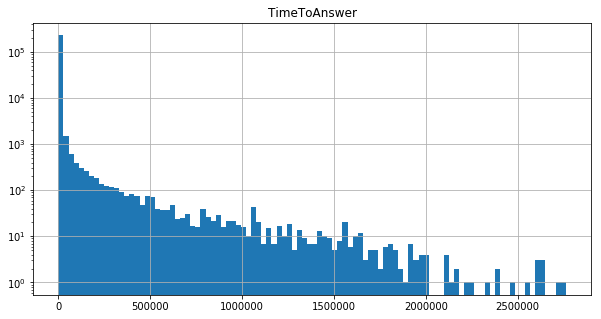

In [54]:
df = pd.read_csv('encodedFull.csv')
df = df.fillna(0)
#Drop 0 time to answer row as these are in error
df = df[df['TimeToAnswer'] >= 0]
df['Downvoted'] = np.where((df['Downvotes'] > 5) & (df['Downvotes'] / df['Votes'] > 0.1), 1, 0)
df['AnsweredInHour'] = np.where(((df['TimeToAnswer'] > 0) & (df['TimeToAnswer'] <= 60)), 1, 0)
hist = df.hist(column='TimeToAnswer', bins=100, log=True)
hist

In [44]:
df.columns

Index(['c++', 'c++11', 'qt', 'templates', 'visual-c++', 'boost', 'arrays',
       'pointers', 'vector', 'windows', 'winapi', 'stl', 'multithreading',
       'string', 'opencv', 'linux', 'class', 'opengl', 'gcc', 'visual-studio',
       'algorithm', 'inheritance', 'visual-studio-2010', 'function', 'mfc',
       'java', 'c++14', 'g++', 'dll', 'python', 'operator-overloading',
       'struct', 'c++-cli', 'oop\t3307', 'memory-management', 'iterator',
       'performance', 'cmake', 'memory', 'linker', 'sockets', 'reference',
       'compiler-errors', 'language-lawyer', 'macos', 'const', 'std', 'lambda',
       'file', 'debugging', 'reputation', 'Votes', 'Downvotes', 'LinkType',
       'TimeToAnswer', 'Question Body Char Count', 'Question Body Word Count',
       'Question Title Char Count', 'Question Title Word Count',
       'Question creation date', 'Title end in ?', 'Answer creation date',
       'Downvoted', 'LogTime'],
      dtype='object')

In [55]:
df

,c++,c++11,qt,templates,visual-c++,boost,arrays,pointers,vector,windows,...,Question Body Char Count,Question Body Word Count,Question Title Char Count,Question Title Word Count,Question creation date,Title end in ?,Answer creation date,Downvoted,LogTime,AnsweredInHour
0,0,0,0,0,0,0,0,0,0,0,...,1365,265,54,11,2013-10-01T00:00:25.877,1,2013-10-01 00:20:53,0,2.995732,1
1,1,0,0,0,0,0,0,0,0,1,...,2171,315,39,5,2013-10-01T00:24:06.080,1,2013-12-26 22:15:56,0,11.737276,0
2,1,0,0,0,0,0,0,0,0,0,...,96,18,47,7,2013-10-01T00:26:41.727,1,2013-10-01 00:49:45,0,3.135494,1
3,1,0,0,0,0,0,0,0,0,0,...,18173,2816,71,11,2013-10-01T00:54:47.893,1,2013-10-01 01:56:55,0,4.127134,0
4,1,0,0,0,0,0,0,0,0,0,...,540,102,31,5,2013-10-01T00:55:06.187,1,2013-10-01 01:40:14,0,3.806662,1
5,1,0,0,0,0,0,0,0,0,0,...,1601,231,46,8,2013-10-01T01:04:57.230,1,2013-10-01 01:21:33,0,2.772589,1
6,1,0,0,0,0,0,1,0,0,0,...,1017,180,29,5,2013-10-01T01:13:15.540,1,2013-10-01 01:19:51,0,1.791759,1
7,0,0,0,0,0,0,0,0,0,0,...,645,135,54,8,2013-10-01T01:17:02.357,1,2013-10-01 01:27:31,0,2.302585,1
8,1,0,0,0,0,0,0,0,0,0,...,679,63,37,4,2013-10-01T01:36:19.910,1,2013-10-01 01:38:56,1,0.693147,1
9,1,0,0,0,0,0,0,0,0,0,...,895,134,40,5,2013-10-01T01:40:17.400,1,2013-10-01 10:41:00,0,6.291569,0


In [56]:
out = stats.pointbiserialr(df['Downvoted'], df['AnsweredInHour'])
out

PointbiserialrResult(correlation=-0.013181811046727256, pvalue=1.5653159124838936e-10)

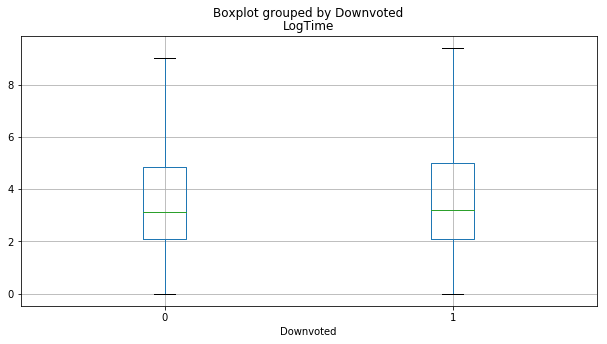

In [48]:
boxplot = df.boxplot(column='LogTime', by='Downvoted', showfliers=False)

In [57]:
neg = df[df['Downvoted'] == 0]
pos = df[df['Downvoted'] == 1]
print(neg['AnsweredInHour'].mean())
print(pos['AnsweredInHour'].mean())

0.6553904337074838
0.6363976719648753
